In [42]:
import setuptools
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [43]:
base_ativos = pd.read_excel('Base_ativos.xlsx')

In [44]:
def excluir_5_dig(COTA):
    return str(COTA)[:6]

def peer(x):
    if x in top10_peers:
        return 'PEER'
    else:
        return 'NAO PEER'

gare11 = ['GARE11.SA']

top10_peers = ['GARE11.SA', 'KNRI11.SA', 'ALZR11.SA', 'TRXF11.SA', 'VIUR11.SA', 'BTLG11.SA', 'BRCO11.SA', 'RBRP11.SA', 'HGRU11.SA', 'GGRC11.SA']

fundos = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA', 'HGRU11.SA',
          'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
          'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA', 'AIEC11.SA',
          'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'JSRE11.SA',
          'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 
          'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA']

fundos_ifix= ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA',
                'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
                'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA', 'AIEC11.SA',
                'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'HGRU11.SA',
                'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 
                'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA', 'GAME11.SA',
                'RZTR11.SA', 'BTRA11.SA', 'SNEL11.SA', 'HTMX11.SA', 'TGAR11.SA', 'JSRE11.SA',
                'MFII11.SA', 'BTHF11.SA', 'RBRF11.SA', 'JSAF11.SA', 'KFOF11.SA', 'RZAK11.SA',
                'BCIA11.SA', 'KISU11.SA', 'XPSF11.SA', 'BPFF11.SA', 'HGFF11.SA', 'SNFF11.SA',
                'RBFF11.SA', 'RVBI11.SA', 'BBFO11.SA', 'KNIP11.SA', 'KNCR11.SA', 'MXRF11.SA', 
                'IRDM11.SA', 'KNHY11.SA', 'CPTS11.SA', 'RECR11.SA', 'HCTR11.SA', 'CLIN11.SA',
                'KNHF11.SA', 'MCCI11.SA', 'HGCR11.SA', 'KNUQ11.SA', 'VGHF11.SA', 'URPR11.SA',
                'VRTA11.SA', 'VGIR11.SA', 'RBRR11.SA', 'VCJR11.SA', 'DEVA11.SA', 'RBRY11.SA', 
                'KNSC11.SA', 'MCRE11.SA', 'VGIP11.SA', 'CVBI11.SA', 'BTCI11.SA', 'XPCI11.SA',  
                'HABT11.SA', 'BCRI11.SA', 'CACR11.SA', 'AFHI11.SA', 'BARI11.SA', 'SNCI11.SA', 
                'KCRE11.SA', 'PORD11.SA', 'MANA11.SA', 'VSLH11.SA', 'OUJP11.SA', 'ARRI11.SA',
                'WHGR11.SA', 'RBRX11.SA', 'HSAF11.SA', 'KIVO11.SA', 'SPXS11.SA',  'CYCR11.SA']



data_inicial = '2024-12-02'
data_final = '2024-12-31'

tab_cotacoes = yf.download(fundos, data_inicial, data_final)['Close']
tab_cotacoes= tab_cotacoes.round(2)
tab_cotacoes.index = pd.to_datetime(tab_cotacoes.index)

tab_gare11 = yf.download(gare11, data_inicial, data_final)['Close']
tab_gare11 = tab_gare11.round(2)
tab_gare11.index = pd.to_datetime(tab_gare11.index)

var_mensal = (tab_cotacoes.loc['2024-12-06'] - tab_cotacoes.loc['2024-12-02'])/tab_cotacoes.loc['2024-12-02']
var_gare11 = (tab_gare11.loc['2024-12-06'] - tab_gare11.loc['2024-12-02'])/tab_gare11.loc['2024-12-02']

tab_mensal = pd.DataFrame(var_mensal)
tab_mensal = tab_mensal.rename(columns={0:'VARIAÇÃO'})

df_gare11 = pd.DataFrame(var_gare11)
df_gare11 = df_gare11.rename(columns = {0:'VARIAÇÃO'})

media_tijolo = (tab_mensal['VARIAÇÃO'].mean())
definitivo_gare11 = (df_gare11['VARIAÇÃO'].mean())

consolidado = {'VAR_TIJOLO':[media_tijolo], 'VAR_GARE11':[definitivo_gare11]}
df_tijoloxgare11 = pd.DataFrame(consolidado)
df_tijoloxgare11

[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  1 of 1 completed


,VAR_TIJOLO,VAR_GARE11
0,-0.031749,-0.001157


In [45]:
data_inicial_teste = '2025-2-10'
data_final_teste = '2025-2-12'

teste = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA']
teste_ativo = yf.download(fundos_ifix, data_inicial_teste, data_final_teste)['Close']
ativo_volume = yf.download(fundos_ifix, data_inicial_teste, data_final_teste)['Volume']
teste_ativo

[*********************100%***********************]  115 of 115 completed
[*********************100%***********************]  115 of 115 completed


Ticker,AFHI11.SA,AIEC11.SA,AJFI11.SA,ALZR11.SA,ARRI11.SA,BARI11.SA,BBFO11.SA,BCIA11.SA,BCRI11.SA,BLMG11.SA,...,VIUR11.SA,VRTA11.SA,VSLH11.SA,WHGR11.SA,XPCI11.SA,XPIN11.SA,XPLG11.SA,XPML11.SA,XPSF11.SA,ZAVI11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-10,87.529999,46.009998,6.85,96.199997,7.47,61.880001,56.549999,76.900002,57.360001,27.84,...,5.26,74.300003,2.89,8.06,72.300003,65.180000,89.550003,98.070000,5.51,89.599998
2025-02-11,88.610001,46.000000,6.71,96.199997,7.41,61.759998,56.680000,76.860001,57.389999,28.48,...,5.22,74.870003,2.89,8.01,71.779999,64.010002,90.000000,97.800003,5.53,92.000000


In [46]:
ativo_transposto = teste_ativo.T
ativo_transposto = ativo_transposto.round(2)
ativo_transposto = ativo_transposto.rename(columns = {'Ticker':'TICKER'})
ativo_transposto = pd.DataFrame(ativo_transposto)
volume_transposto = ativo_volume.T
volume_transposto = volume_transposto.round(2)
volume_transposto = volume_transposto.rename(columns = {'Ticker':'TICKER'})
volume_transposto = pd.DataFrame(volume_transposto)

base_ativos = base_ativos.rename(columns={'TICKER':'Ticker'})

In [47]:
ativo_transposto

Date,2025-02-10,2025-02-11
Ticker,,
AFHI11.SA,87.53,88.61
AIEC11.SA,46.01,46.00
AJFI11.SA,6.85,6.71
ALZR11.SA,96.20,96.20
ARRI11.SA,7.47,7.41
...,...,...
XPIN11.SA,65.18,64.01
XPLG11.SA,89.55,90.00
XPML11.SA,98.07,97.80


In [48]:
ativos_merge = pd.merge(base_ativos, ativo_transposto[['2025-2-11', '2025-2-10']],
                        on = ['Ticker'],
                        how='left',
                        suffixes=('', '_PREÇO'))

ativos_merge.rename(columns={pd.Timestamp('2025-2-11 00:00:00'): 'Preço1', pd.Timestamp('2025-2-10 00:00:00'): 'Preço2' }, inplace=True)
ativos_merge['VM'] = ativos_merge['COTAS']*ativos_merge['Preço1']
ativos_merge['P/VP'] = ativos_merge['VM']/ativos_merge['VP MM']
ativos_merge['P/VP'] = ativos_merge['P/VP'].round(2)
ativos_merge['VARIAÇÃO_DIARIA'] = ((ativos_merge['Preço1'] - ativos_merge['Preço2'])/ativos_merge['Preço2'])*100
ativos_merge['VARIAÇÃO_DIARIA'] = ativos_merge['VARIAÇÃO_DIARIA'].round(2)
ativos_merge = ativos_merge.drop(columns=['SUP', 'COTISTAS'])
ativos_merge['Peer_GARE'] = ativos_merge['Ticker'].apply(peer)

ativos_merge = pd.merge(ativos_merge, volume_transposto[['2025-2-11', '2025-2-10']],
                        on = ['Ticker'],
                        how='left',
                        suffixes=('', '_Vol'))

ativos_merge.rename(columns={pd.Timestamp('2025-2-11 00:00:00'): 'Volume1', pd.Timestamp('2025-2-10 00:00:00'): 'Volume2' }, inplace=True)
ativos_merge = ativos_merge.drop(columns=['Volume2'])
ativos_merge= ativos_merge.rename(columns={'Volume1':'Quantidade'})
ativos_merge['Volume'] = ativos_merge['Preço1']*ativos_merge['Quantidade']
ativos_merge['%PL'] = ativos_merge['Volume']/ativos_merge['VP MM']
ativos_merge

,Ticker,TIPO,VP MM,COTAS,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,DIV Y1,DIV Y3,DIV Y6,DIV Y12,Preço1,Preço2,VM,P/VP,VARIAÇÃO_DIARIA,Peer_GARE,Quantidade,Volume,%PL
0,KNRI11.SA,HIB Tijolo,4.553042e+09,28204047,7.592850e+06,1.442641e+08,1.0000,3.000,6.000000,11.000000,129.60,129.97,3.655244e+09,0.80,-0.28,PEER,27617.0,3579163.20,0.000786
1,TVRI11.SA,HIB Tijolo,1.614022e+09,15919690,1.540689e+06,2.927309e+07,1.0300,2.990,5.930000,10.790000,82.24,81.94,1.309235e+09,0.81,0.37,NAO PEER,0.0,0.00,0.000000
2,ALZR11.SA,HIB Tijolo,1.279322e+09,12226625,2.312998e+06,4.394697e+07,0.8055,2.386,4.621209,8.366883,96.20,96.20,1.176201e+09,0.92,0.00,PEER,8635.0,830687.00,0.000649
3,GARE11.SA,XXXX,1.350740e+09,147458223,6.658875e+06,1.265186e+08,0.0830,0.267,0.536000,0.971000,7.87,7.91,1.160496e+09,0.86,-0.51,PEER,580377.0,4567566.99,0.003382
4,RBRP11.SA,HIB Tijolo,9.339984e+08,12179186,1.658621e+06,3.151379e+07,0.4100,1.490,3.090000,5.980000,39.83,41.70,4.850970e+08,0.52,-4.48,PEER,38954.0,1551537.82,0.001661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,SPXS11.SA,Recebivel,1.884556e+08,20189040,4.815625e+05,9.149687e+06,0.1000,0.300,0.601000,1.086000,7.51,7.73,1.516197e+08,0.80,-2.85,NAO PEER,22849.0,171595.99,0.000911
113,ARRI11.SA,Recebivel,1.726284e+08,20138980,5.812750e+05,1.104422e+07,0.0900,0.270,0.550000,1.060000,7.41,7.47,1.492298e+08,0.86,-0.80,NAO PEER,157145.0,1164444.45,0.006745
114,CYCR11.SA,Recebivel,3.428976e+08,36549445,7.738895e+05,1.470390e+07,0.1000,0.290,0.560000,1.130000,7.90,7.79,2.887406e+08,0.84,1.41,NAO PEER,55946.0,441973.40,0.001289
115,CLIN11.SA,Recebivel,4.192289e+08,4346763,1.412549e+06,2.683842e+07,1.0000,3.000,5.880000,10.830000,76.36,77.30,3.319188e+08,0.79,-1.22,NAO PEER,8808.0,672578.88,0.001604


In [49]:
#CRIO UM DATAFRAME PARA VER AS MEDIAS DO SETOR EM COMPARAÇÃO AO GARE
medias_setores = ativos_merge.groupby(by = 'TIPO')[['VARIAÇÃO_DIARIA', 'P/VP', 'Volume', 'Quantidade', '%PL']].mean().round(4)
medias_setores['VARIAÇÃO_DIARIA'] = medias_setores['VARIAÇÃO_DIARIA'].astype(float)
medias_setores['VARIAÇÃO_DIARIA'] = medias_setores['VARIAÇÃO_DIARIA'].round(2)
medias_setores['Volume'] = (medias_setores['Volume']/1000).round(0)
medias_setores['Quantidade'] = (medias_setores['Quantidade']/1000).round(0)
medias_setores

,VARIAÇÃO_DIARIA,P/VP,Volume,Quantidade,%PL
TIPO,,,,,
Desenvolvimento,-0.57,0.6850,2155.0,29.0,0.0013
Fof,0.34,0.7423,807.0,82.0,0.0013
HIB Tijolo,-0.38,0.7033,1081.0,25.0,0.0009
Lajes,0.13,0.5829,892.0,25.0,0.0008
Logistico,0.55,0.6913,1689.0,31.0,0.0009
Outros Imóveis,-0.46,0.9100,1686.0,29.0,0.0042
Recebivel,-0.49,0.7830,1909.0,117.0,0.0015
Renda Urbana,-0.08,0.7875,2245.0,35.0,0.0012
Shopping,-0.76,0.6867,2692.0,75.0,0.0013


In [50]:
medias_peers = ativos_merge.query('Peer_GARE == "PEER"')
medias_peers = medias_peers.sort_values(by=['VARIAÇÃO_DIARIA'], ascending=False).iloc[:10, :]
medias_peers = medias_peers.drop(columns = ['TIPO','VM','COTAS','LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'DIV Y1', 'DIV Y12', 'Preço1', 'Preço2', 'Peer_GARE'])
medias_peers['%PL'] = medias_peers['Volume']/medias_peers['VP MM']
medias_peers['Ticker'] = medias_peers['Ticker'].apply(excluir_5_dig)
medias_peers['Volume'] = (medias_peers['Volume']/1000).round(0)
medias_peers['Quantidade'] = (medias_peers['Quantidade']/1000).round(0)
medias_peers = medias_peers[['Ticker', 'VARIAÇÃO_DIARIA', 'P/VP', 'Volume', 'Quantidade', '%PL']]
medias_peers

,Ticker,VARIAÇÃO_DIARIA,P/VP,Volume,Quantidade,%PL
8,TRXF11,0.66,0.94,2459.0,25.0,0.001171
12,BTLG11,0.30,0.91,5667.0,60.0,0.001253
7,HGRU11,0.29,0.89,4535.0,41.0,0.001570
15,BRCO11,0.13,0.80,2418.0,26.0,0.001280
18,GGRC11,0.11,0.80,1951.0,214.0,0.001405
2,ALZR11,0.00,0.92,831.0,9.0,0.000649
0,KNRI11,-0.28,0.80,3579.0,28.0,0.000786
3,GARE11,-0.51,0.86,4568.0,580.0,0.003382
10,VIUR11,-0.76,0.59,272.0,52.0,0.001135
4,RBRP11,-4.48,0.52,1552.0,39.0,0.001661


In [51]:
top_10_altas = ativos_merge.nlargest(10, 'VARIAÇÃO_DIARIA')
top_10_baixas = ativos_merge.nsmallest(10, 'VARIAÇÃO_DIARIA')

top_10_altasXbaixas = pd.concat([top_10_altas,top_10_baixas]).reset_index(drop=True)
top_10_altasXbaixas = top_10_altasXbaixas.drop(columns = ['TIPO', 'VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço1',
                                    'Preço2', 'VM', 'P/VP'])
top_10_altasXbaixas

,Ticker,DIV Y1,DIV Y3,DIV Y6,DIV Y12,VARIAÇÃO_DIARIA,Peer_GARE,Quantidade,Volume,%PL
0,BROF11.SA,0.5700,1.5300,2.82000,5.414688,5.51,NAO PEER,20064.0,995174.40,0.000789
1,VINO11.SA,0.0500,0.1500,0.30000,0.597000,4.41,NAO PEER,161444.0,765244.56,0.000861
2,RBFF11.SA,0.5100,1.5400,3.07000,5.610000,3.49,NAO PEER,4879.0,230288.80,0.001030
3,ZAVI11.SA,1.0500,3.3500,6.90000,12.660000,2.68,NAO PEER,2730.0,251160.00,0.001626
4,TRBL11.SA,0.6200,1.8600,4.18000,8.430000,2.48,NAO PEER,8056.0,483360.00,0.000630
5,BLMG11.SA,0.3500,0.8500,2.35000,3.690000,2.30,NAO PEER,6585.0,187540.80,0.000646
6,KCRE11.SA,0.1100,0.2800,0.53000,1.046000,2.04,NAO PEER,49497.0,396965.94,0.001157
7,RBRX11.SA,0.0800,0.2400,0.49000,1.020000,1.45,NAO PEER,48628.0,341368.56,0.001220
8,VILG11.SA,0.6500,1.9000,3.75000,6.830000,1.42,NAO PEER,24979.0,1818970.78,0.001067
9,CYCR11.SA,0.1000,0.2900,0.56000,1.130000,1.41,NAO PEER,55946.0,441973.40,0.001289


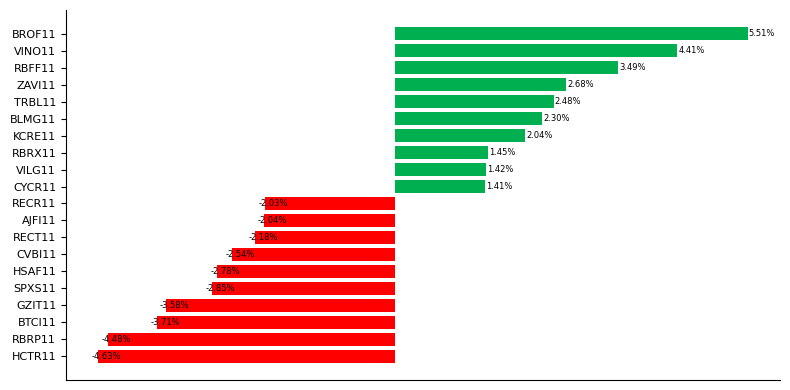

In [52]:
top_10_altas = ativos_merge.nlargest(10, 'VARIAÇÃO_DIARIA')
top_10_baixas = ativos_merge.nsmallest(10, 'VARIAÇÃO_DIARIA')

top_10_altasXbaixas = pd.concat([top_10_altas,top_10_baixas]).reset_index(drop=True)

top_10_altasXbaixas = top_10_altasXbaixas.drop(columns = ['TIPO', 'VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço1',
                                    'Preço2', 'VM', 'P/VP'])
top_10_altasXbaixas = top_10_altasXbaixas.sort_values(by='VARIAÇÃO_DIARIA', ascending = True)
top_10_altasXbaixas['Ticker'] = top_10_altasXbaixas['Ticker'].apply(excluir_5_dig)

fig, ax = plt.subplots(figsize=(8, 4))

# Criar as barras horizontais com cores baseadas na variação diária
graf_barras = ax.barh(
    top_10_altasXbaixas['Ticker'], 
    top_10_altasXbaixas['VARIAÇÃO_DIARIA'], 
    color=['#00B050' if var > 0 else '#FF0000' for var in top_10_altasXbaixas['VARIAÇÃO_DIARIA']]
)

# Adicionar rótulos de dados às barras
for barra in graf_barras:
    largura = barra.get_width()
    deslocamento = 0.1 if largura < 0 else 0.02
    ax.text(
        largura - deslocamento if largura < 0 else largura + deslocamento, 
        barra.get_y() + barra.get_height() / 2,
        f'{largura:,.2f}%',
        ha='left', 
        va='center', 
        fontsize=6, 
        color='black'  # Cor dos rótulos de texto
    )

# Personalizar o gráfico
ax.set_ylabel('', fontsize=12, color='black')  # Nome do eixo Y em branco
ax.get_xaxis().set_visible(False)  # Ocultar eixo X
ax.spines['top'].set_visible(False)  # Ocultar borda superior
ax.spines['right'].set_visible(False)  # Ocultar borda direita
ax.spines['bottom'].set_visible(True) # Ocultar borda inferior
ax.spines['left'].set_color('black') # Alterando cor da linha do eixo Y
ax.tick_params(axis='y', labelsize=8, color = 'black') 

# Ajustar rótulos do eixo Y para ficarem brancos
for label in ax.get_yticklabels():
    label.set_color('Black')  # Define a cor dos rótulos do eixo Y
    label.set_fontsize(8)  # Ajusta o tamanho da fonte, se necessário

# Salvar o gráfico em um arquivo PNG
fig.savefig('VARIAÇÕES_DIARIAS.png', transparent=True, dpi=400, bbox_inches='tight')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [76]:
base_dividendos = ativos_merge.copy()

base_dividendos = base_dividendos.drop(columns = ['VP MM', 'COTAS', 'LIQUIDEZ - MÉDIA', 'LIQUIDEZ - SOMA', 'Preço2', 'VM'])
base_dividendos['DIV Y1'] = base_dividendos['DIV Y1'].round(4)
base_dividendos['DIV Y12'] = base_dividendos['DIV Y12'].round(4)

base_dividendos['DY 1M'] = ((base_dividendos['DIV Y1']/base_dividendos['Preço1'])).round(4)
base_dividendos['DY 3M'] = ((base_dividendos['DIV Y3']/base_dividendos['Preço1'])).round(4)
base_dividendos['DY 6M'] = ((base_dividendos['DIV Y6']/base_dividendos['Preço1'])).round(4)
base_dividendos['DY YTD'] = base_dividendos['DY 1M']*12
base_dividendos['DY 12M'] = ((base_dividendos['DIV Y12']/base_dividendos['Preço1'])).round(4)
base_dividendos

df_dividendos = base_dividendos.copy()
df_dividendos = df_dividendos.drop(columns=['DIV Y1', 'DIV Y3', 'DIV Y6', 'DIV Y12', 'Quantidade', '%PL', 'VARIAÇÃO_DIARIA', 'Volume'])
df_dividendos

,Ticker,TIPO,Preço1,P/VP,Peer_GARE,DY 1M,DY 3M,DY 6M,DY YTD,DY 12M
0,KNRI11.SA,HIB Tijolo,129.60,0.80,PEER,0.0077,0.0231,0.0463,0.0924,0.0849
1,TVRI11.SA,HIB Tijolo,82.24,0.81,NAO PEER,0.0125,0.0364,0.0721,0.1500,0.1312
2,ALZR11.SA,HIB Tijolo,96.20,0.92,PEER,0.0084,0.0248,0.0480,0.1008,0.0870
3,GARE11.SA,XXXX,7.87,0.86,PEER,0.0105,0.0339,0.0681,0.1260,0.1234
4,RBRP11.SA,HIB Tijolo,39.83,0.52,PEER,0.0103,0.0374,0.0776,0.1236,0.1501
...,...,...,...,...,...,...,...,...,...,...
112,SPXS11.SA,Recebivel,7.51,0.80,NAO PEER,0.0133,0.0399,0.0800,0.1596,0.1446
113,ARRI11.SA,Recebivel,7.41,0.86,NAO PEER,0.0121,0.0364,0.0742,0.1452,0.1430
114,CYCR11.SA,Recebivel,7.90,0.84,NAO PEER,0.0127,0.0367,0.0709,0.1524,0.1430
115,CLIN11.SA,Recebivel,76.36,0.79,NAO PEER,0.0131,0.0393,0.0770,0.1572,0.1418


In [79]:
df_setores = df_dividendos.groupby(by = 'TIPO')[['P/VP', 'DY 1M', 'DY 3M', 'DY 6M', 'DY YTD', 'DY 12M']].mean().round(4)
df_setores

,P/VP,DY 1M,DY 3M,DY 6M,DY YTD,DY 12M
TIPO,,,,,,
Desenvolvimento,0.6850,0.0144,0.0454,0.0923,0.1722,0.1771
Fof,0.7423,0.0120,0.0367,0.0710,0.1438,0.1299
HIB Tijolo,0.7033,0.0094,0.0292,0.0587,0.1130,0.1113
Lajes,0.5829,0.0097,0.1063,0.1404,0.1167,0.2006
Logistico,0.6913,0.0104,0.0309,0.0638,0.1251,0.1152
Outros Imóveis,0.9100,0.0081,0.0364,0.0694,0.0975,0.1221
Recebivel,0.7830,0.0130,0.0381,0.0747,0.1558,0.1400
Renda Urbana,0.7875,0.0105,0.0377,0.0700,0.1260,0.1245
Shopping,0.6867,0.0090,0.0317,0.0654,0.1081,0.1225


In [81]:
df_dividendos_peers = df_dividendos.query('Peer_GARE == "PEER"')

df_dividendos_peers = df_dividendos_peers.sort_values(by=['DY 12M'], ascending=False).iloc[:10, :]
df_dividendos_peers = df_dividendos_peers.drop(columns=['TIPO','Preço1', 'Peer_GARE'])
df_dividendos_peers['Ticker'] = df_dividendos_peers['Ticker'].apply(excluir_5_dig)
df_dividendos_peers

,Ticker,P/VP,DY 1M,DY 3M,DY 6M,DY YTD,DY 12M
4,RBRP11,0.52,0.0103,0.0374,0.0776,0.1236,0.1501
10,VIUR11,0.59,0.0128,0.0385,0.0770,0.1536,0.1412
3,GARE11,0.86,0.0105,0.0339,0.0681,0.1260,0.1234
8,TRXF11,0.94,0.0095,0.0444,0.0728,0.1140,0.1205
18,GGRC11,0.80,0.0104,0.0319,0.0638,0.1248,0.1137
15,BRCO11,0.80,0.0092,0.0276,0.0551,0.1104,0.1010
7,HGRU11,0.89,0.0081,0.0333,0.0568,0.0972,0.0987
12,BTLG11,0.91,0.0092,0.0256,0.0501,0.1104,0.0902
2,ALZR11,0.92,0.0084,0.0248,0.0480,0.1008,0.0870
0,KNRI11,0.80,0.0077,0.0231,0.0463,0.0924,0.0849
